# Flight Price Prediction 

###### The objective of this project is to predict flight prices given the various parameters. Data used in this article is publicly available at Kaggle. This will be a regression problem since the target or dependent variable is the price (continuous numeric value).

In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [373]:
pd.set_option("display.max_columns",None)

In [470]:
#loading the train data
df_train = pd.read_excel("Data/Data_Train.xlsx")

In [471]:
#loading the test data
df_test = pd.read_excel("Data/Test_set.xlsx")

In [472]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [473]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### The data is of the year 2019 only. hence we can drop year from date of journey

In [474]:
df_train.shape

(10683, 11)

In [475]:
df_test.shape

(2671, 10)

In [476]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [477]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [478]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [479]:
# removing missing values 
df_train = df_train.dropna()

In [480]:
df_train.shape    

(10682, 11)

# EDA

In [481]:
df_train["Day_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"],
                                           format="%d/%m/%Y").dt.day # to create day from day_of_journey

In [482]:
df_train["Month_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"],
                                           format="%d/%m/%Y").dt.month # to create month from day_of_journey

In [483]:
#similarly for test_data
df_test["Day_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"],
                                           format="%d/%m/%Y").dt.day 

df_test["Month_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"],
                                           format="%d/%m/%Y").dt.month

In [484]:
# dropping the Date_of_journey col

df_train = df_train.drop(["Date_of_Journey"],axis=1)
df_test = df_test.drop(["Date_of_Journey"],axis=1)

In [485]:
#Departure time handling

df_train["Dep_Hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

df_train["Dep_Min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

df_test["Dep_Hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour

df_test["Dep_Min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [486]:
# dropping Dep_Time

df_train = df_train.drop(["Dep_Time"],axis=1)

df_test = df_test.drop(["Dep_Time"],axis=1)

In [487]:
#extracting Arrival_Time

df_train["Arrival_Hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arrival_Min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

df_test["Arrival_Hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_Min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

In [488]:
# dropping Arrival_Time

df_train = df_train.drop(["Arrival_Time"],axis=1)
df_test = df_test.drop(["Arrival_Time"],axis=1)

In [489]:
# extracting duration for train data

temp = list(df_train["Duration"])

new_temp =[]

# converting xh:ym into x:m

for x in range(len(temp)):
    if len(temp[x])<=3: #if only minutes or only hours is given
        if "h" in list(temp[x]):
            x_new = re.sub("h","",temp[x])
            x_new = str(x_new) +":"+"0"
            new_temp.append(x_new)
        if "m" in list(temp[x]):
            x_new = re.sub("m","",temp[x])
            x_new = "0"+":"+str(x_new)
            new_temp.append(x_new)
    else:
        x_new = re.sub("h ",":",temp[x])
        x_new = re.sub("m","",x_new)
        new_temp.append(x_new)        

In [490]:
df_train["Duration"] = new_temp

In [491]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2:50,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7:25,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19:0,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5:25,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4:45,1 stop,No info,13302,1,3,16,50,21,35


In [492]:
len(df_test)

2671

In [493]:
# extracting duration for test data

temp1 = list(df_test["Duration"])

new_temp1 =[]

# converting xh:ym into x:m

for x in range(len(temp1)):
    if len(temp1[x])<=3: #if only minutes or only hours is given
        if "h" in list(temp1[x]):
            x_new = re.sub("h","",temp1[x])
            x_new = str(x_new) +":"+"0"
            new_temp1.append(x_new)
        else:
            x_new = re.sub("m","",temp1[x])
            x_new = "0"+":"+str(x_new)
            new_temp1.append(x_new)
    else:
        x_new = re.sub("h ",":",temp1[x])
        x_new = re.sub("m","",x_new)
        new_temp1.append(x_new)        

In [494]:
df_test["Duration"] = new_temp1

In [495]:
#extracting the hours from Duration
df_train["Duration_Hour"] = [int(x.split(":")[0]) for x in df_train["Duration"]]

In [496]:
#extracting the minute from Duration
df_train["Duration_Min"] = [int(x.split(":")[1]) for x in df_train["Duration"]]

In [497]:
#similarly for test train
df_test["Duration_Hour"] = [int(x.split(":")[0]) for x in df_test["Duration"]]
df_test["Duration_Min"] = [int(x.split(":")[1]) for x in df_test["Duration"]]

In [498]:
# dropping Duration col

df_train = df_train.drop(["Duration"],axis=1)
df_test = df_test.drop(["Duration"],axis=1)

In [499]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [500]:
#function to clean total stops  
def clean_stops(x):
    if x =="non-stop":
        return 0
    else:
        x = x.split(" ")
        x = x[0]
        x = int(x)
        return x

In [501]:
#using map function to apply clean
df_train["Total_Stops"] = df_train["Total_Stops"].map(clean_stops)

df_test["Total_Stops"] = df_test["Total_Stops"].map(clean_stops)

# Handling Categorical Data

In [502]:
df_train["Airline"].value_counts() # ordinal data---> use one hot encoding

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

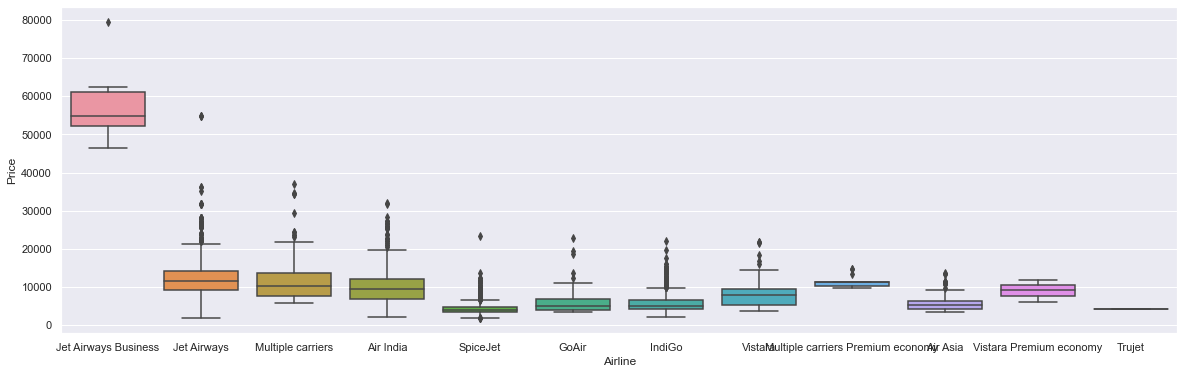

In [503]:
#boxplot of airlines with respect to price
plt.figure(figsize=(20,6))
sns.boxplot(x="Airline",
            y = "Price",
            data = df_train.sort_values("Price",ascending=False)
           )

In [504]:
#onehot encoding

Airline = df_train[["Airline"]]

In [505]:
Airline.head()

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo


In [506]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [507]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [508]:
df_train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

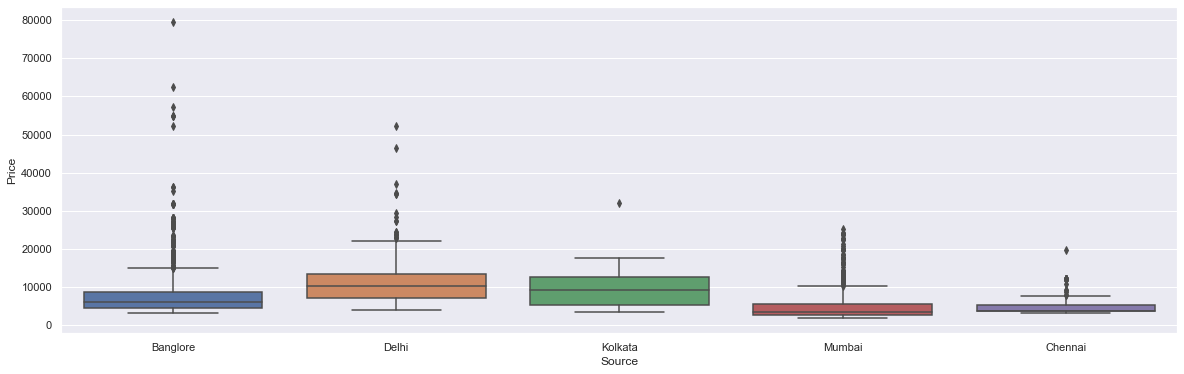

In [509]:
#boxplot of Source with respect to price
plt.figure(figsize=(20,6))
sns.boxplot(x="Source",
            y = "Price",
            data = df_train.sort_values("Price",ascending=False)
           )

In [510]:
#onehot encoding

Source = df_train[["Source"]]

In [511]:
Source = pd.get_dummies(Source,drop_first=True)

In [512]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [513]:
df_train.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

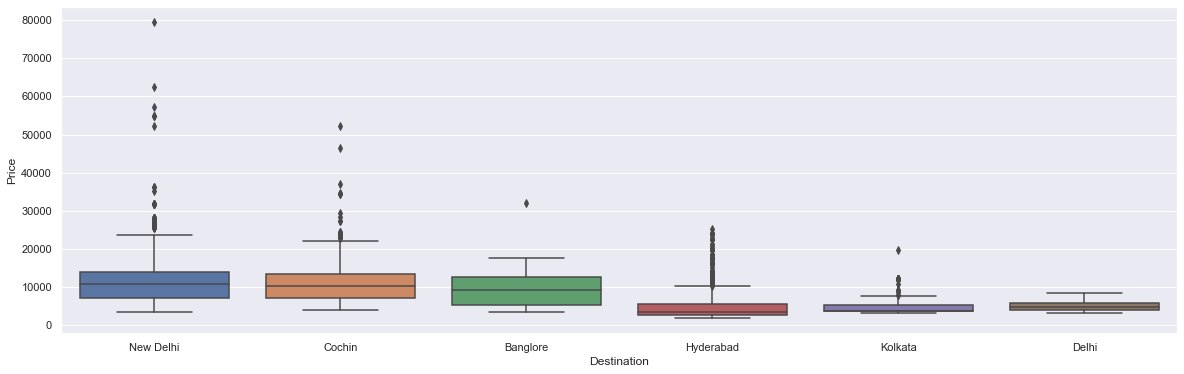

In [514]:
#boxplot of Destination with respect to price
plt.figure(figsize=(20,6))
sns.boxplot(x="Destination",
            y = "Price",
            data = df_train.sort_values("Price",ascending=False)
           )

In [515]:
#onehot encoding

Destination = df_train[["Destination"]]

In [516]:
Destination = pd.get_dummies(Destination,drop_first=True)

In [517]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [518]:
df_train["Route"] # route and total stops are explaining the same, hence we can drop


0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [519]:
df_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


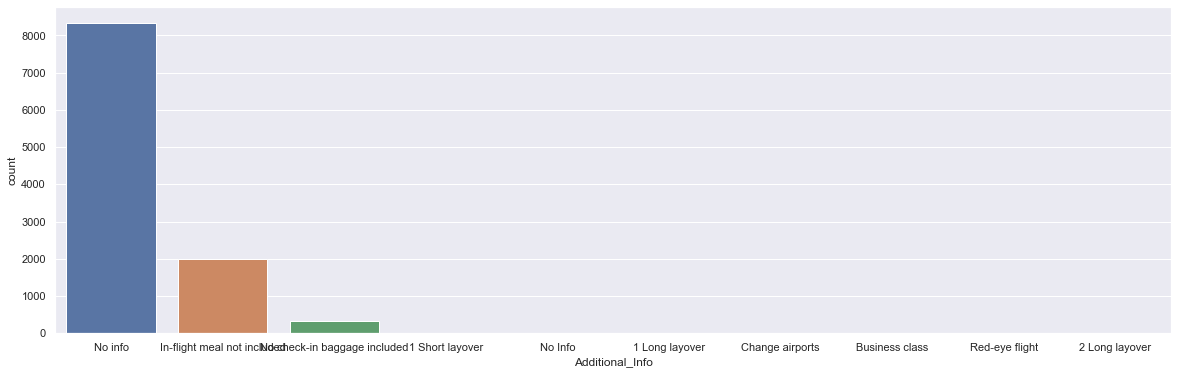

In [520]:
plt.figure(figsize=(20,6))
sns.countplot(df_train["Additional_Info"])
plt.show()

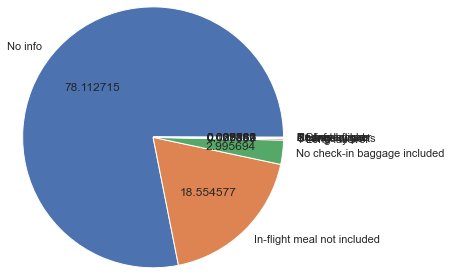

In [521]:
plt.pie(dict(df_train["Additional_Info"].value_counts()).values(),
        labels=dict(df_train["Additional_Info"].value_counts()).keys(),
        autopct="%2f",
        radius=1.5)

plt.show()

In [522]:
# since most of the additional_info column is non info, we can drop them

In [523]:
df_train = df_train.drop(["Additional_Info","Route"],axis=1)

df_test = df_test.drop(["Additional_Info","Route"],axis=1)

In [524]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [525]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [526]:
#concating onehot encoded columns


df_train = pd.concat([df_train,Airline,Source,Destination],axis=1)

In [527]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [528]:
df_train = df_train.drop(["Airline","Source","Destination"],axis=1)

In [529]:
df_train.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [530]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [531]:
Airline = df_test[["Airline"]]

In [532]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [533]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [534]:
Source = df_test[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [535]:
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [536]:
df_test = pd.concat([df_test,Airline,Source,Destination],axis=1)

In [537]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [538]:
df_test = df_test.drop(["Airline","Source","Destination"],axis=1)

In [539]:
df_test.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [540]:
df_test.shape

(2671, 28)

In [541]:
df_train.shape

(10682, 30)

# Feature Selection


    * Using Correlation
    * Using Model.feature_importances_(ExtraTreesRegressor)

In [542]:
df_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [543]:
#splitting into X and y 
X = df_train.loc[:,['Total_Stops','Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [544]:
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [545]:
y = df_train.loc[:,["Price"]]

In [546]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


<AxesSubplot:>

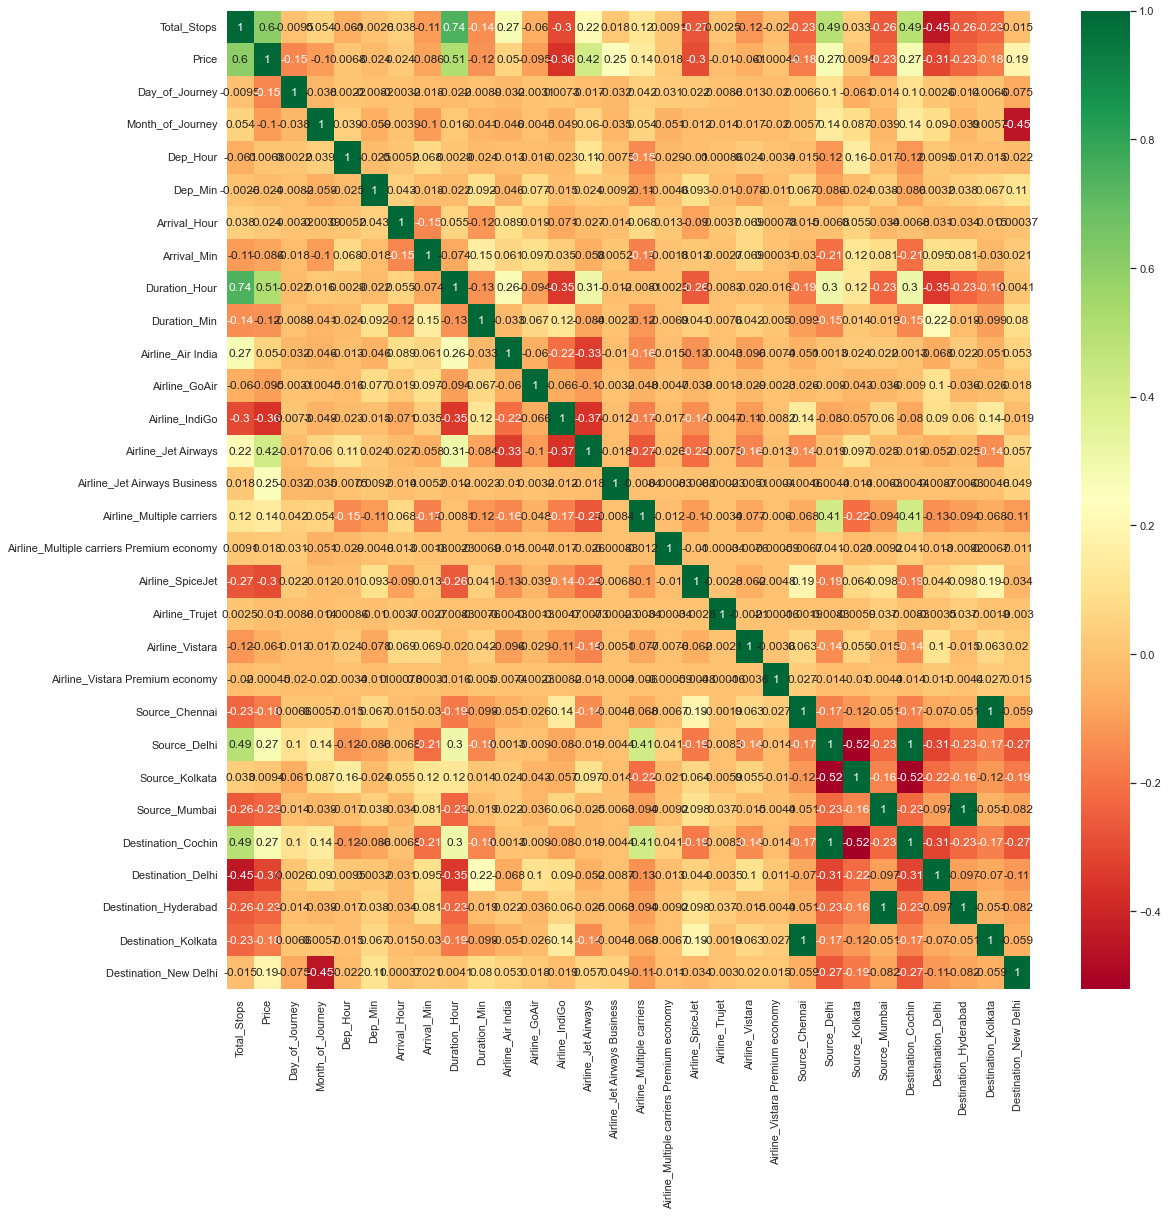

In [547]:
#correlation heatmap

plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True,
           cmap="RdYlGn")

In [548]:
#important features using  ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

In [549]:
selection = ExtraTreesRegressor()

In [550]:
selection.fit(X,y)

C:\Users\Shivah Sae\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor()

In [551]:
print(selection.feature_importances_)

[2.29195998e-01 1.44405214e-01 5.35594399e-02 2.37475463e-02
 2.12245024e-02 2.81070727e-02 1.88284826e-02 1.15845382e-01
 1.77333601e-02 1.04233227e-02 2.07179959e-03 1.97520140e-02
 1.39750554e-01 6.79970798e-02 1.69053788e-02 8.18378985e-04
 2.90212957e-03 1.24977965e-04 4.82521921e-03 7.96710920e-05
 5.10620206e-04 1.41457161e-02 3.30405895e-03 5.80249342e-03
 1.04096544e-02 1.59266513e-02 6.13266674e-03 4.87486684e-04
 2.49831290e-02]


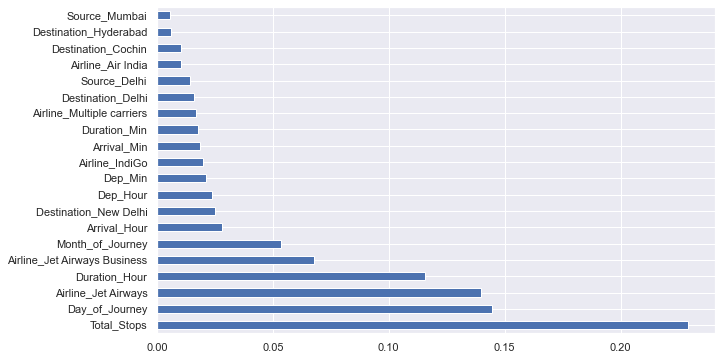

In [552]:
#plot graph of feature importances
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
feature_selection = pd.Series(selection.feature_importances_,index=X.columns)
feature_selection.nlargest(20).plot(kind="barh")
plt.show()

# Fitting the model

In [554]:
from sklearn.model_selection import train_test_split

In [556]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,
                               random_state=10)

In [557]:
from sklearn.ensemble import RandomForestRegressor

In [558]:
model = RandomForestRegressor()

In [559]:
model.fit(X_train,y_train)

C:\Users\Shivah Sae\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [560]:
y_pred = model.predict(X_test)

In [561]:
model.score(X_train,y_train)

0.95412687955104

In [562]:
model.score(X_test,y_test)

0.8005832280210903

In [570]:
y_test.shape

(2137, 1)

In [573]:
type(y_test)

pandas.core.frame.DataFrame

In [574]:
y_test = np.array(y_test)

In [577]:
y_test.shape

(2137, 1)

In [571]:
y_pred.shape

(2137,)

In [572]:
type(y_pred)

numpy.ndarray

In [578]:
y_pred = y_pred.reshape((2137,1))

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


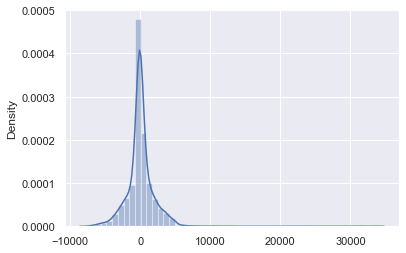

In [580]:
sns.distplot(y_test-y_pred)
plt.show()

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


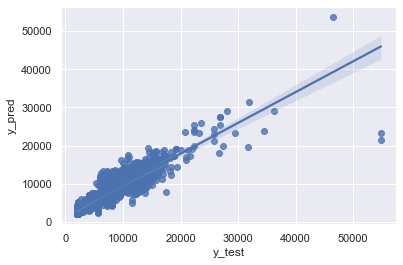

In [626]:
sns.regplot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [593]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [588]:
mean_absolute_error(y_test,y_pred)

1205.9410478125444

In [590]:
mean_squared_error(y_test,y_pred)

4309347.739666648

In [592]:
np.sqrt(mean_squared_error(y_test,y_pred)) #root mean squre error

2075.8968518851434

In [594]:
r2_score(y_test,y_pred)

0.8005832280210903

# Hyper Paramter Tuning

In [595]:
#using randomsearchcv
from sklearn.model_selection import RandomizedSearchCV

In [597]:
#no of trees for rf model
n_estimators =[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [598]:
#no of features to consider at the time of split

max_features =["auto","sqrt"]

In [599]:
# max depth in tree

max_depth =[int(x) for x in np.linspace(5,30,num=6)]

In [600]:
# minimum no of samples required to split a node

min_samples_split =[2,5,10,15,100]

In [601]:
# minimum no of samples required at each leaf node

min_samples_leaf =[1,2,5,10]

In [604]:
# implementing randomsearchcv

param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf
            }

In [618]:
rscv = RandomizedSearchCV(estimator=model,
                         param_distributions=param_grid,
                         n_iter=10,
                         cv=5,
                         verbose=1,
                          random_state=40,
                          n_jobs=1
                         )

In [619]:
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: Dat

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py:598: Dat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, verbose=1)

In [620]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [644]:
model_final = RandomForestRegressor(n_estimators =200,
                                    min_samples_split=15,
                                    min_samples_leaf=1,
                                    max_features = "sqrt",max_depth=20)

In [645]:
model_final.fit(X_train,y_train)

C:\Users\Shivah Sae\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=15,
                      n_estimators=200)

In [646]:
y_predict = model_final.predict(X_test)

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


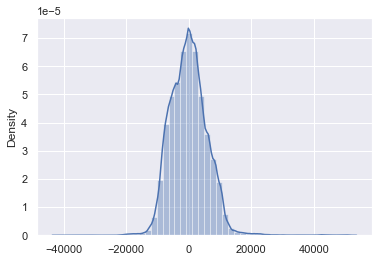

In [647]:
sns.distplot(y_test-y_predict)
plt.show()

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


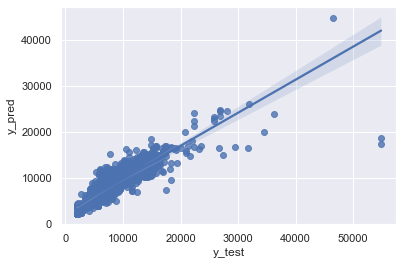

In [648]:
sns.regplot(y_test,y_predict)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [649]:
mean_absolute_error(y_test,y_predict)

1318.069388455965

In [650]:
mean_squared_error(y_test,y_predict)

4683466.471214549

In [651]:
np.sqrt(mean_squared_error(y_test,y_pred)) #root mean squre error

2075.8968518851434

In [652]:
r2_score(y_test,y_pred)

0.8005832280210903

In [632]:
# saving the model

In [653]:
import pickle

In [654]:
pickle_file = open("reg.pkl","wb")

In [655]:
pickle.dump(model_final,pickle_file)